In [1]:
#import the necessary libraries

#Data Wrangling
import pandas
import numpy as np
import os

import gensim #library needed for word2vec

#for visualization
from scipy.spatial.distance import cosine
from sklearn.metrics import pairwise
from sklearn.manifold import MDS, TSNE
import matplotlib.pyplot as plt

In [2]:
#Visualization parameters
%pylab inline
%matplotlib inline
matplotlib.style.use('fivethirtyeight')

Populating the interactive namespace from numpy and matplotlib


In [5]:
#read in all the data, with some cleaning
path ='../data/' #indicate the local path where files are stored
allFiles = os.listdir(path) #save the list of filenames into a variable
print(allFiles)

['Dataset-clean.csv', 'New-Dataset.CSV']


In [6]:
list_ = []
files_ = []
for file_ in allFiles:
    filename = path+file_ #add the relative path name to the filename
    df = pandas.read_csv(filename, index_col=None, header=0)
    list_.append(df)
data = pandas.concat(list_).reset_index(drop=True)
#view the data
data

,TI,DE,ID,AB,PY
0,Assessing the unpaved shoulder of an airport r...,Runway; Port Harcourt; LRS 10; Penetration ind...,NaN,In upgrading the facilities of an Internationa...,2018
1,Wick drains and piling for Cai Mep container p...,Wick drain; Full-scale tests; Settlement; Piles,NaN,"A container terminal, Cai Mep port in the Meko...",2018
2,ITER plasma source and building modelling to p...,ITER; Tokamak Complex; radiation maps; source ...,SHUTDOWN DOSE-RATE; PORT CELL,The ITER Tokamak Complex is the civil structur...,2018
3,Performance evaluation of steam cured HPC pipe...,Metakaolin; Pipe piles; Pore structure; Phase ...,SUPPLEMENTARY CEMENTITIOUS MATERIALS; DIFFEREN...,High performance pipe piles are widely used in...,2018
4,Beyond the Enclave of Urban Theory,Urban theory; methodology; global urbanism; St...,STUART HALL; CITY; RACE; URBANIZATION; GEOGRAP...,This essay offers a methodological interventio...,2018
5,Atmospheric corrosion study in a harbor locate...,atmospheric corrosion; harbor; tropical climate,MILD-STEEL; REINFORCED-CONCRETE; MARINE AEROSO...,Atmospheric corrosion level in tropical coasta...,2018
6,Renewable energy cooperatives: Facilitating th...,Renewable energy; Energy cooperatives; Port of...,CHALLENGES; CLUSTERS,Renewable energy cooperatives (RECs) are an im...,2018
7,Properties of Plain Concrete Produced Employin...,Mixed recycled aggregate; Sea water; Blast fur...,COMPRESSIVE STRENGTH; STRUCTURAL CONCRETE; HYD...,The generation of construction and demolition ...,2018
8,Consolidation Behavior of Fly Ash-Based Geopol...,Consolidation; Dredged mud; Fly ash; Geopolyme...,MARINE CLAY; SOIL; CEMENT; LIME; SEDIMENTS,Ports use soft dredged material for land recla...,2018
9,Influence of manufactured sand's characteristi...,Manufactured sand; Particle shape; Gradation; ...,HIGH-STRENGTH CONCRETE; DRYING SHRINKAGE; PART...,Manufactured sand (MS) is widely considered as...,2018


In [7]:
#Number of rows
data.shape

(2674, 5)

In [8]:
#View the first text
data.iloc[0,1]

'Runway; Port Harcourt; LRS 10; Penetration index; CBR'

# Example with tiny data
- data cleaning
- stop words
- adding stop words
- stemmers for reducing inflectional forms

In [43]:
from nltk.tokenize import sent_tokenize, word_tokenize
 
data = "Concrete, usually Portland cement concrete, is a composite material composed of fine and coarse aggregate bonded together with a fluid cement (cement paste) that hardens over time—most frequently a lime-based cement binder, such as Portland cement, but sometimes with other hydraulic cements, such as a calcium aluminate cement. It is distinguished from other, non-cementitious types of concrete all binding some form of aggregate together, including asphalt concrete with a bitumen binder, which is frequently used for road surfaces, and polymer concretes that use polymers as a binder."
tokens = word_tokenize(data)
print(len(tokens))
print(tokens)

100
['Concrete', ',', 'usually', 'Portland', 'cement', 'concrete', ',', 'is', 'a', 'composite', 'material', 'composed', 'of', 'fine', 'and', 'coarse', 'aggregate', 'bonded', 'together', 'with', 'a', 'fluid', 'cement', '(', 'cement', 'paste', ')', 'that', 'hardens', 'over', 'time—most', 'frequently', 'a', 'lime-based', 'cement', 'binder', ',', 'such', 'as', 'Portland', 'cement', ',', 'but', 'sometimes', 'with', 'other', 'hydraulic', 'cements', ',', 'such', 'as', 'a', 'calcium', 'aluminate', 'cement', '.', 'It', 'is', 'distinguished', 'from', 'other', ',', 'non-cementitious', 'types', 'of', 'concrete', 'all', 'binding', 'some', 'form', 'of', 'aggregate', 'together', ',', 'including', 'asphalt', 'concrete', 'with', 'a', 'bitumen', 'binder', ',', 'which', 'is', 'frequently', 'used', 'for', 'road', 'surfaces', ',', 'and', 'polymer', 'concretes', 'that', 'use', 'polymers', 'as', 'a', 'binder', '.']


In [36]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
import string 
from nltk.stem import PorterStemmer



In [26]:
def removeStopWords(words):
    #select english stopwords
    cachedStopWords = set(stopwords.words('english'))
    #sets
    newStopWords = ['that','all','use']
    exclude = set(string.punctuation) 
    #
    cachedStopWords = cachedStopWords.union(newStopWords)
    cachedStopWords = cachedStopWords.union(exclude)
    new_words = [w for w in words if w not in cachedStopWords]
    return new_words

In [27]:
newWords = removeStopWords(words)
print(newWords)

['Concrete', 'usually', 'Portland', 'cement', 'concrete', 'composite', 'material', 'composed', 'fine', 'coarse', 'aggregate', 'bonded', 'together', 'fluid', 'cement', 'cement', 'paste', 'hardens', 'time—most', 'frequently', 'lime-based', 'cement', 'binder', 'Portland', 'cement', 'sometimes', 'hydraulic', 'cements', 'calcium', 'aluminate', 'cement', 'It', 'distinguished', 'non-cementitious', 'types', 'concrete', 'binding', 'form', 'aggregate', 'together', 'including', 'asphalt', 'concrete', 'bitumen', 'binder', 'frequently', 'used', 'road', 'surfaces', 'polymer', 'concretes', 'polymers', 'binder']


In [37]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
import string 
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

def preprocessing(text):
   
    # tokenize into words
    tokens = [word for sent in sent_tokenize(text) for word in word_tokenize(sent)]
    
    # remove stopwords here might bring you headaches - put it last
    #stop = stopwords.words('english')
    #tokens = [token for token in tokens if token not in stop]
    
    # remove words less than three letters
    tokens = [word for word in tokens if len(word) >= 3]

    # lower capitalization
    tokens = [word.lower() for word in tokens]

    # steemize
    ps = PorterStemmer()
    tokens = [ps.stem(word) for word in tokens]
    
    # remove stopwords    
    cachedStopWords = set(stopwords.words('english'))
    #subsets
    newStopWords = ['that','usual','include','type']
    exclude = set(string.punctuation) 
    #adding to set
    cachedStopWords = cachedStopWords.union(newStopWords)
    cachedStopWords = cachedStopWords.union(exclude)
    tokens = [w for w in tokens if w not in cachedStopWords]

    # lemmatize
    lmtzr = WordNetLemmatizer()
    tokens = [lmtzr.lemmatize(word) for word in tokens]
    preprocessed_text= ' '.join(tokens)
    
    return preprocessed_text 

In [40]:
#Better now with stems and lemmas
goodTokens = preprocessing(data)

# Simple visualization

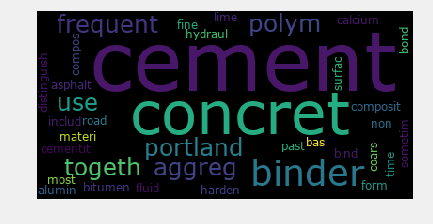

In [41]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS 

text = 'all your base are belong to us all of your base base base'

def generate_wordcloud(text): # optionally add: stopwords=STOPWORDS and change the arg below
    wordcloud = WordCloud(font_path='/Library/Fonts/Verdana.ttf',
                          relative_scaling = 1.0,
                          stopwords = {'to', 'of'} # set or space-separated string
                          ).generate(text)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

generate_wordcloud(goodTokens)

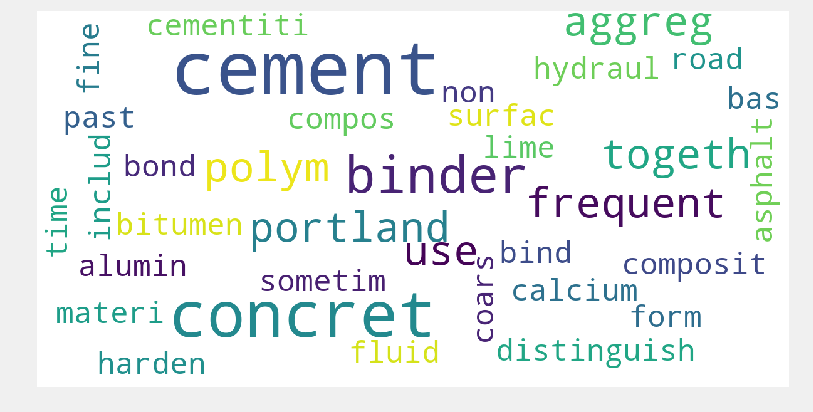

In [42]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()
show_wordcloud(goodTokens)

# Todo
1. how to add to stop words
2. scientific stop words?


In [38]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
print(len(stop_words))
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
print(len(stop_words))

153
158
